 

# **FEATURE SELECTION FOR OFFLINE MODEL**



## **LOADING DATASET**

In [1]:
import pandas as pd
import numpy as np
heartds=pd.read_csv("C:\heart.csv")
print('shape:',heartds.shape)
heartds.head()

shape: (303, 14)


,AGE,SEX,CPT,RBP,SCH,FBS,RES,MHR,EIA,OPK,PES,VCA,THA,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## **PREPROCESSING THE DATA**



### **REMOVING MISSING VALUES**



In [2]:
heartds.replace('?', np.nan, inplace=True)
heartds.dropna()
heartds.head()

,AGE,SEX,CPT,RBP,SCH,FBS,RES,MHR,EIA,OPK,PES,VCA,THA,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1




### **MinMaxScaler**


In [4]:
!pip install sklearn
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_heartds=pd.DataFrame(scaler.fit_transform(heartds),index=heartds.index,columns=heartds.columns)
print(scaled_heartds.head())
scaled_heartds.dtypes

You should consider upgrading via the 'c:\users\mekal\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
    Running setup.py install for sklearn: started
    Running setup.py install for sklearn: finished with status 'done'
        AGE  SEX       CPT       RBP       SCH  FBS  RES       MHR  EIA  \
0  0.708333  1.0  1.000000  0.481132  0.244292  1.0  0.0  0.603053  0.0   
1  0.166667  1.0  0.666667  0.339623  0.283105  0.0  0.5  0.885496  0.0   
2  0.250000  0.0  0.333333  0.339623  0.178082  0.0  0.0  0.770992  0.0   
3  0.562500  1.0  0.333333  0.245283  0.251142  0.0  0.5  0.816794  0.0   
4  0.583333  0.0  0.000000  0.245283  0.520548  0.0  0.5  0.702290  1.0   

        OPK  PES  VCA       THA  target  
0  0.370968  0.0  0.0  0.333333     1.0  
1  0.564516  0.0  0.0  0.666667     1.0  
2  0.225806  1.0  0.0  0.666667     1.0  
3  0.129032  1.0  0.0  0.666667     1.0  
4  0.096774  1.0  0.0  0.666667     1.0  


AGE       float64
SEX       float64
CPT       float64
RBP       float64
SCH       float64
FBS       float64
RES       float64
MHR       float64
EIA       float64
OPK       float64
PES       float64
VCA       float64
THA       float64
target    float64
dtype: object

# **FEATURE SELECTION**


## **UNIVARIATE FEATURE SELECTION**



In [5]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
x=heartds.iloc[:,:-1]
y=pd.DataFrame(heartds['target'])
train,test=train_test_split(heartds,test_size=0.1,random_state=42)
print('train set: ',train.shape)
print('test set: ',test.shape)
x_train=train.drop('target',axis=1).values
y_train=train['target'].values
x_test=test.drop('target',axis=1).values
y_test=test['target'].values
print('x_train: ',x_train.shape)
print('y_train: ',y_train.shape)
print('x_test: ',x_test.shape)
print('y_test: ',y_test.shape)
unifeatures = SelectKBest(chi2,k=7).fit(x_train,y_train)
print('chi2 scores are:')
for i in range(len(unifeatures.scores_)):
  print('%s: %f'%(x.columns[i],unifeatures.scores_[i]))
print('7 important features are:')
uf=[]
for i,j in zip(unifeatures.get_support(),x.columns):
  if i:
    uf.append(j)
print(uf)

train set:  (272, 14)
test set:  (31, 14)
x_train:  (272, 13)
y_train:  (272,)
x_test:  (31, 13)
y_test:  (31,)
chi2 scores are:
AGE: 25.606321
SEX: 6.797526
CPT: 56.252488
RBP: 11.591489
SCH: 13.850154
FBS: 0.058936
RES: 2.228641
MHR: 139.960037
EIA: 35.614805
OPK: 64.435121
PES: 8.513957
VCA: 62.814368
THA: 5.289767
7 important features are:
['AGE', 'CPT', 'SCH', 'MHR', 'EIA', 'OPK', 'VCA']


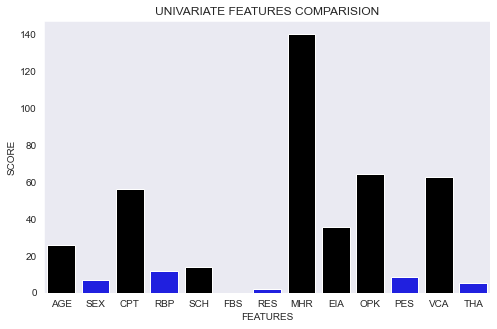

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(figsize=(8,5))
sns.set_style('dark')
clrs=['blue' if i not in uf else 'black' for i in x]
ax=sns.barplot(x=x.columns,y=unifeatures.scores_,palette=clrs)
plt.title('UNIVARIATE FEATURES COMPARISION')
plt.xlabel('FEATURES')
plt.ylabel('SCORE')
plt.show()


## **RELIEF FEATURE SELECTION**







In [7]:
!pip install skrebate
from skrebate import ReliefF
x_train=x_train.astype('float')
relfeatures=ReliefF(n_features_to_select=7,n_neighbors=100).fit(x_train,y_train)
header=train.columns.to_list()
features=header[0:len(header)-1]
weights={'name':features,'weights':relfeatures.feature_importances_}
weights_df=pd.DataFrame(weights)
weights_df=weights_df.sort_values(by='weights')
print('weights are:')
print(weights_df)
rf=list(weights_df['name'].loc[7:])[::-1]
print('7 important features are:')
print(rf)

Using legacy 'setup.py install' for skrebate, since package 'wheel' is not installed.
    Running setup.py install for skrebate: started
    Running setup.py install for skrebate: finished with status 'done'


You should consider upgrading via the 'c:\users\mekal\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


weights are:
   name   weights
5   FBS  0.002353
4   SCH  0.005546
3   RBP  0.005950
6   RES  0.022022
0   AGE  0.044049
1   SEX  0.066618
7   MHR  0.096795
9   OPK  0.104400
10  PES  0.139191
2   CPT  0.173640
8   EIA  0.179926
11  VCA  0.189632
12  THA  0.278309
7 important features are:
['THA', 'VCA', 'EIA', 'CPT', 'PES', 'OPK', 'MHR']


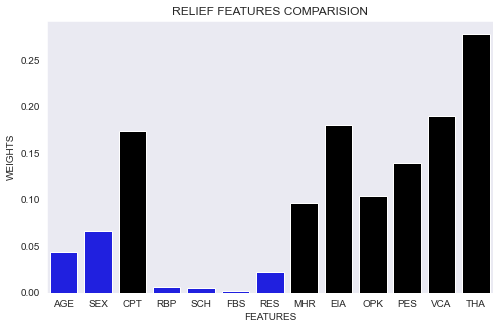

In [12]:
plt.subplots(figsize=(8,5))
sns.set_style('dark')
clrs=['blue' if i not in rf else 'black' for i in x]
ax=sns.barplot(x=x.columns,y=relfeatures.feature_importances_,palette=clrs)
plt.title('RELIEF FEATURES COMPARISION')
plt.xlabel('FEATURES')
plt.ylabel('WEIGHTS')
plt.show()